<a href="https://colab.research.google.com/github/elyal2/UPC2023/blob/main/1_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Big Data Analytics and Machine Learning with NLP and Computer Vision**
# *Course Overview*
Welcome to our comprehensive course on Big Data Analytics and Machine Learning, where we'll delve into the fascinating realms of Natural Language Processing (NLP) and Computer Vision. This course is designed to equip you with the essential skills and knowledge needed to analyze, interpret, and glean insights from large datasets using advanced machine learning techniques.

Throughout this journey, we'll explore how machine learning can be applied to understand and process human languages and visual data, opening doors to numerous applications in various industries.

# **Lesson 1: Time Series Forecasting with Pandas and Prophet**
In our first lesson, we'll start by exploring time series data using Python's Pandas library and Facebook's Prophet tool. Time series analysis is crucial for understanding trends, forecasting future values, and making data-driven decisions.

We'll be working with a real-world dataset: the log of Peyton Manning's Wikipedia page views. Our goal is to forecast future traffic to this page using the data we have.
# *Code Walkthrough*

*   **Import Libraries**: We start by importing [pandas](https://pandas.pydata.org/), a powerful data manipulation library, and [Prophet](https://facebook.github.io/prophet/), a tool developed by Facebook (META) for forecasting with time series data.
*   **Load and View Data**: We load the dataset using pandas.read_csv(), which reads data from a CSV file into a DataFrame. We then use df.head() to preview the first few rows of our data.

In [6]:
# Importing necessary libraries
import pandas as pd
from prophet import Prophet

# Loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
# Displaying the first few rows of the dataframe
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572




*   **Initialize and Fit Prophet Model**: We create an instance of the Prophet class and fit it to our dataset. Prophet models time series data, considering trends and seasonal patterns.
*   **Create Future DataFrame**: make_future_dataframe is used to extend our current dataset into the future for a specified number of periods (days in this case).



In [3]:
# Initializing the Prophet model
m = Prophet()
# Fitting the model with our dataset
m.fit(df)

# Creating a dataframe that extends about 10 years (10000 iterations by default)
# into the future considering a repeating period of 365 days
future = m.make_future_dataframe(periods=365)
# Displaying the last few rows of the future dataframe
future.tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcv8h8f48/wk50o1se.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcv8h8f48/_knjc3bc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55066', 'data', 'file=/tmp/tmpcv8h8f48/wk50o1se.json', 'init=/tmp/tmpcv8h8f48/_knjc3bc.json', 'output', 'file=/tmp/tmpcv8h8f48/prophet_modelcal2jitr/prophet_model-20231112100323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:03:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:03:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19




*   **Make Predictions**: Using the predict method of our Prophet model, we forecast future values for the dates in our extended dataframe.
*   **View Forecast**: We use slicing to view specific columns of our forecast, focusing on dates (ds), forecasted values (yhat), and the upper and lower bounds of the forecast's confidence intervals (yhat_lower and yhat_upper).



In [4]:
# Making predictions using our model for the dates in the future dataframe
forecast = m.predict(future)
# Displaying the forecasted values and their confidence intervals
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.210097,7.438287,8.906375
3266,2017-01-16,8.535122,7.789573,9.233111
3267,2017-01-17,8.322549,7.611696,8.991431
3268,2017-01-18,8.155179,7.430561,8.881302
3269,2017-01-19,8.167136,7.475108,8.906960




*   **Plotting the Forecast**: Finally, we visualize our forecast using m.plot(), which provides a graphical representation of the predicted values over time.



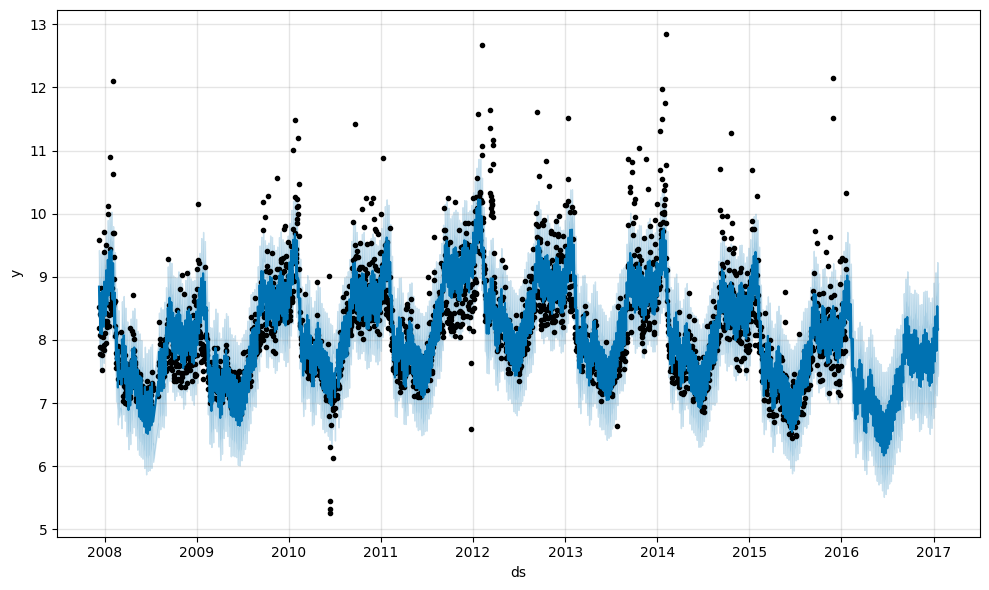

In [5]:
# Plotting the forecast
fig1 = m.plot(forecast)

# **Extra info**
# *Time Series*
A time series is a sequence of data points collected or recorded at regular time intervals. This type of data is ubiquitous and can be found in various domains such as finance (stock prices), meteorology (weather data), economics (GDP growth), and web analytics (website traffic). What distinguishes a time series from other types of data is its temporal order — changes and patterns in the data are often correlated with time.

# *Forecasting*
Forecasting in the context of time series refers to the use of historical data to predict future values. It involves analyzing the trends, seasonal patterns, and other characteristics of past data to project what might happen in the future. Forecasting is vital in decision-making processes across numerous fields, from setting inventory levels in retail to predicting energy demands or stock market trends.

# *Prophet Library*
Prophet, developed by Facebook's Core Data Science team, is a library for forecasting time series data. It stands out due to its ease of use, flexibility, and ability to handle the peculiarities of business time series data. Key features that make Prophet particularly special include:

1.   Robust to Missing Data and Shifts in Trend: Prophet can handle missing data and is resilient to shifts in the trend, making it suitable for real-world datasets that are often imperfect.
2.   Handling of Seasonality: It can model annual, weekly, and daily seasonality, as well as holiday effects, which are common in business time series.
3.   Trend Change Points: Prophet automatically detects points in time where the time series have abrupt changes in their trajectories, allowing it to adapt to shifts in trends.
4.   Intuitive Parameters: Parameters in Prophet are intuitive (like growth rate, seasonality, and holiday effects) and don't require in-depth statistical knowledge to tune.
5.   Scalability and Speed: Prophet is designed to be fast and can handle a large number of time series.
6.   Open Source and Integrable: It’s an open-source tool and can easily integrate with other Python data analysis libraries, like Pandas and matplotlib, for pre-processing and visualization.

In summary, Prophet simplifies the process of forecasting by providing a practical and efficient tool that can handle the complexities and irregularities often found in real-world time series data.

Text(0.5, 1.0, '2014-2015 Peyton Manning Wikipedia Page Views')

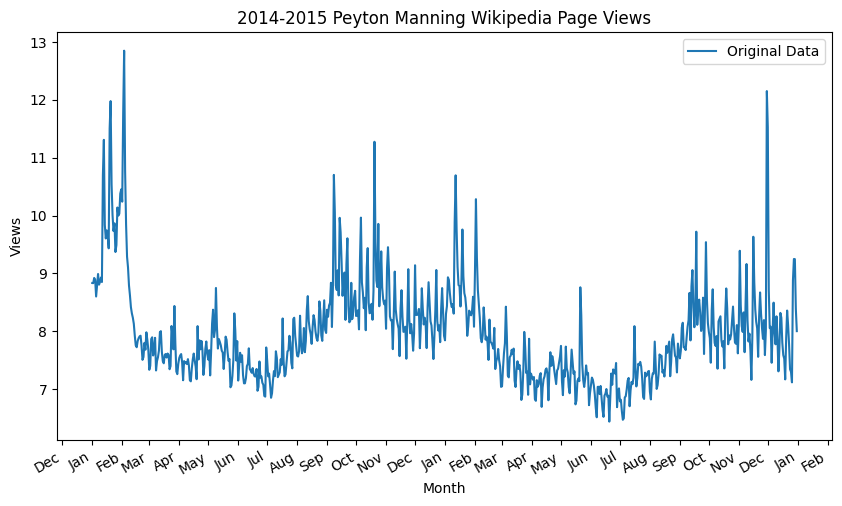

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Converting 'ds' to datetime format for better handling in matplotlib
df['ds'] = pd.to_datetime(df['ds'])
# Filtering the DataFrame for the years 2014 and 2015
df_2014_2015 = df[(df['ds'].dt.year == 2014) | (df['ds'].dt.year == 2015)]

# Plotting the original data
plt.figure(figsize=(10, 6))
plt.plot(df_2014_2015['ds'], df_2014_2015['y'], label='Original Data')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Formatting x-axis to show month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())            # Setting major ticks to months
plt.gcf().autofmt_xdate()  # Auto-format the x-axis labels for better readability
plt.legend()
plt.xlabel('Month')
plt.ylabel('Views')
plt.title('2014-2015 Peyton Manning Wikipedia Page Views')